In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np

from create_structures import create_structures
from load_structures import load_structures
from find_function_max import find_function_max
from read_spectrum_curve import read_spectrum_curve

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Масштабирующий множитель:

freq > 2000: 0.96;

freq <= 2000: 0.98.

## Предварительное изучение
<!-- В таблице ниже приведены диапазоны характерестических частот для лактонов [1]:

| Compound Class | Group | Absorption (cm-1) | Appearance| 
| --- | --- | --- | --- |
| ester | C-O stretching | 1210-1163 | strong |
| δ-lactone	| C=O stretching | 1750-1735 | strong| -->


In [3]:
structs_with_lactone_fg = ['lactone_lactol_w3', 'lactone_lactol_def', 'lactone_aromatic', 'valerolactone']
create_structures(structs_with_lactone_fg)
structs = load_structures(structs_with_lactone_fg)

New structures have been successfully created!
Structure(s) lactone_lactol_w3 lactone_lactol_def lactone_aromatic valerolactone have been successfully loaded!


Ниже приведены спектры структур lactone_lactol_w3 (4 лактонных группы с краю каркаса) и lactone_lactol_def (одна лактонная группа  

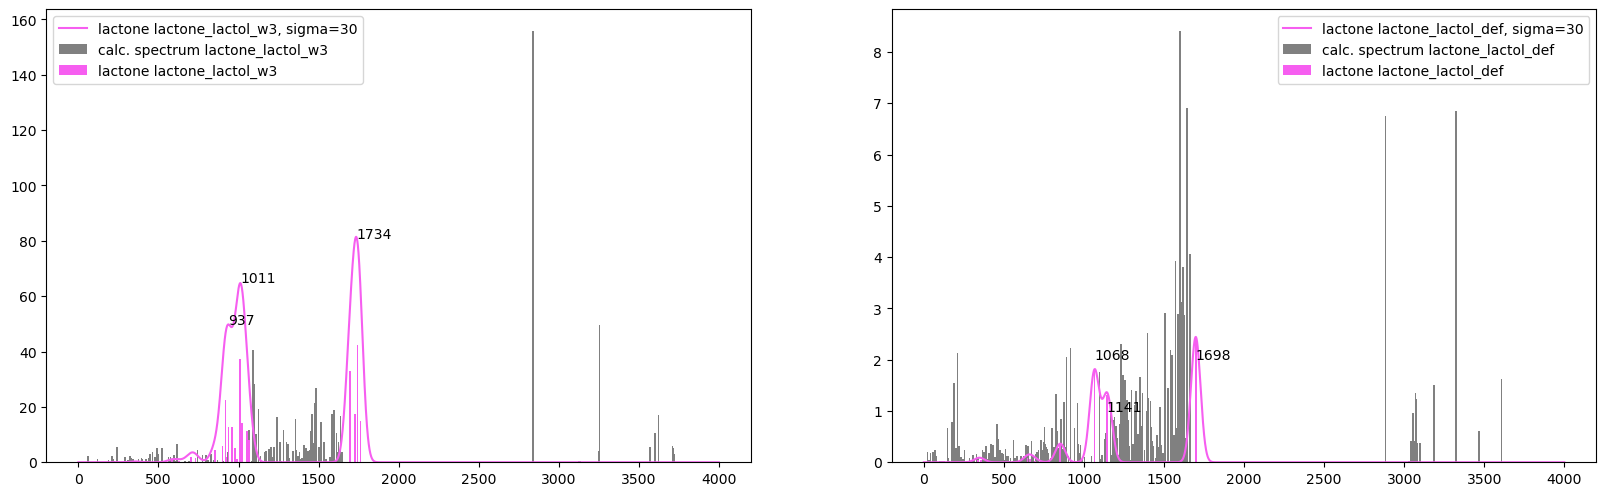

In [4]:
plt.figure(figsize=(20, 6), dpi=100)

plt.subplot(1, 2, 1)
structs['lactone_lactol_w3'].pm.spectrum_bar()
structs['lactone_lactol_w3'].pm.fg_bar('lactone')
structs['lactone_lactol_w3'].pm.fg_sum_curve('lactone')

plt.legend()

plt.subplot(1, 2, 2)
structs['lactone_lactol_def'].pm.spectrum_bar()
structs['lactone_lactol_def'].pm.fg_bar('lactone')
structs['lactone_lactol_def'].pm.fg_sum_curve('lactone')
plt.legend()

In [26]:
structs['lactone_lactol_w3'].get_report('lactone', corrected=True)

,"freq, cm-1","values, %",internal_coordinates
0,1760.898913,87+6,OC(65-37)+COC(37-26-25)
1,1743.309891,75+7,OC(56-27)+COC(27-17-18)
2,1728.843239,40+29+8+7+4,CC(19-29)+OC(52-51)+COC(48-47-39)+OC(56-27)+CC...
3,1694.732087,32+31+9+7+4,OC(17-18)+OC(17-18)+COC(7-6-5)+HOC(64-61-16)+C...
4,1065.706781,8+6+5+5+5+4+4,OC(26-37)+OC(26-25)+OC(52-51)+OC(1-2)+OC(17-27...
5,1050.995429,13+13+9+5+4,OC(26-37)+OC(47-48)+OC(47-39)+CCC(29-19-20)+OC...
6,1020.887566,15+6+5+4,OC(26-37)+OC(47-48)+OC(1-9)+OC(1-2)
7,1009.073459,4+4+4,OC(1-2)+OC(17-18)+OC(52-53)
8,988.626344,12+7+6+4+4+4,OC(47-48)+OC(1-2)+OC(1-9)+OC(58-2)+OC(47-39)+O...
9,979.709483,10+7+6+4,OC(6-5)+OC(6-7)+OC(47-48)+CCC(25-24-35)


In [24]:
structs['lactone_lactol_def'].get_report('lactone', corrected=True)

,"freq, cm-1","values, %",internal_coordinates
0,1697.648908,80+9,OC(77-66)+COC(66-19-10)
1,1145.488704,11+8+6+4+4+4,OC(19-66)+HCC(65-32-31)+HCC(64-25-32)+CC(25-32...
2,1065.608901,18+7+7+6+4,OC(19-66)+OC(73-28)+CCC(25-32-31)+CCC(24-25-32...


Сравним расчетные диапазоны с литературными. В таблице ниже приведены результаты сравнения:

| Compound Class | Group | Literature data(cm-1) | Calculated data(cm-1)| 
| :--- | :--- | :--- | :--- |
| ester | C-O stretching | 1130-1310 | 920-1189 |
| δ-lactone	| C=O stretching | 1760-1715 | 1695-1761 |

<!-- В диапазоне C-O колебаний расчетные значения значительно отличаются от литературных данных. Это скорее всего связано с тем, что в колебания C-O в нашей модели оксида графита значительно вовлечены колебания всего каркаса.Также шестичленное кольцо лактона в модельной системе сопряжено с ароматической системой, что значительно отличает от δ-lactone. -->
 
<!--  Для структуры lactone_lactol_w3 расчетная частота, соотвествующая валентным C=O колебаниям равны 1734 см-4. Это хорошо совпадает с литературными данными [3], где частота валентного C=O колебания для непредельной сложноэфирной группы равны 1730-1715 см-1. -->

В структуре lactone_lactol_w3 наибольшая расчетная частота для валентных колебаний вдоль C=O связи составляет 1761 см-1, что соответствует свободной лактонной группе (без водородных связей). Смещение частоты в более коротковолновую область обусловлено наличием водородных связий у карбонильного атома кислорода с соседними гидроксильными группами или молекулами воды. Длины соответсвующих водородных связей у лактонных групп меняются от 1.77 до 2.11 A.
Частоты колебаний, связанные с изменение угла С-O-C в значительной степени отличаются от литературных данных и изменяются в диапазоне от 920 до 1189 см-1. Это связано с тем, что эти колебания в значительной степени затрагивают изменение углов во всем углеродном каркасе.
 
Во второй структуре расчетная частота, соответсвующая валентному колебания вдоль C=O связи значительно сдвинута в низкочастотную область и составляет 1698 см-1. Это связано с тем, что эта лактонная группа связана с гидроксильной группой при помощи водородной связи. В первой структуре имеется аналогичная расчетная мода равная 1695 см-1, эта лактонная группа также имеет водородную связь с молекулой воды.

Таким образом, валентные C=O колебания лактонных функциональных групп в оксиде графита могут лежать в диапазоне от 1695 до 1761 см-1 в зависимости от наличия воды или гидроксильных групп поблизости. Колебания с изменение C-O-C угла лежат в широком интервале от от 920 до 1189 см-1.


# Сравнение расчетных данных с экспериментальным спектром для δ-лактона.

δ-лактон (валеролактон) был расчитан методом DFT B3LYP с использованием базиса 6-31G (d, p). На рисунке ниже приведена структура δ-лактона.

<img src='images/valerolactone.jpg'>

<center><i>Структура δ-лактона.</i></center>

Ниже приведен расчетный спектр и экспериментальный, взятый из базы данных NIST [2].Самая интенсивная полоса, соответсвующая колебанию C=O связи в эксперементальном спектре имеет зашкал.

Моды, отнесенные к колебаниям лактонной группы, в расчетном спектре:
    freq, cm-1              values, %                               internal_coordinates
0  1808.713254                     91                                           OC(14-3)
1  1237.260917   20+16+13+6+5+4+4+4+4  CC(3-4)+HCC(9-1-5)+HCC(10-4-3)+CCO(4-3-14)+HCC...
2  1147.426726  22+13+7+7+6+5+5+4+4+4  CC(3-4)+CC(3-4)+CC(3-4)+HCC(13-5-4)+HCO(7-2-15...


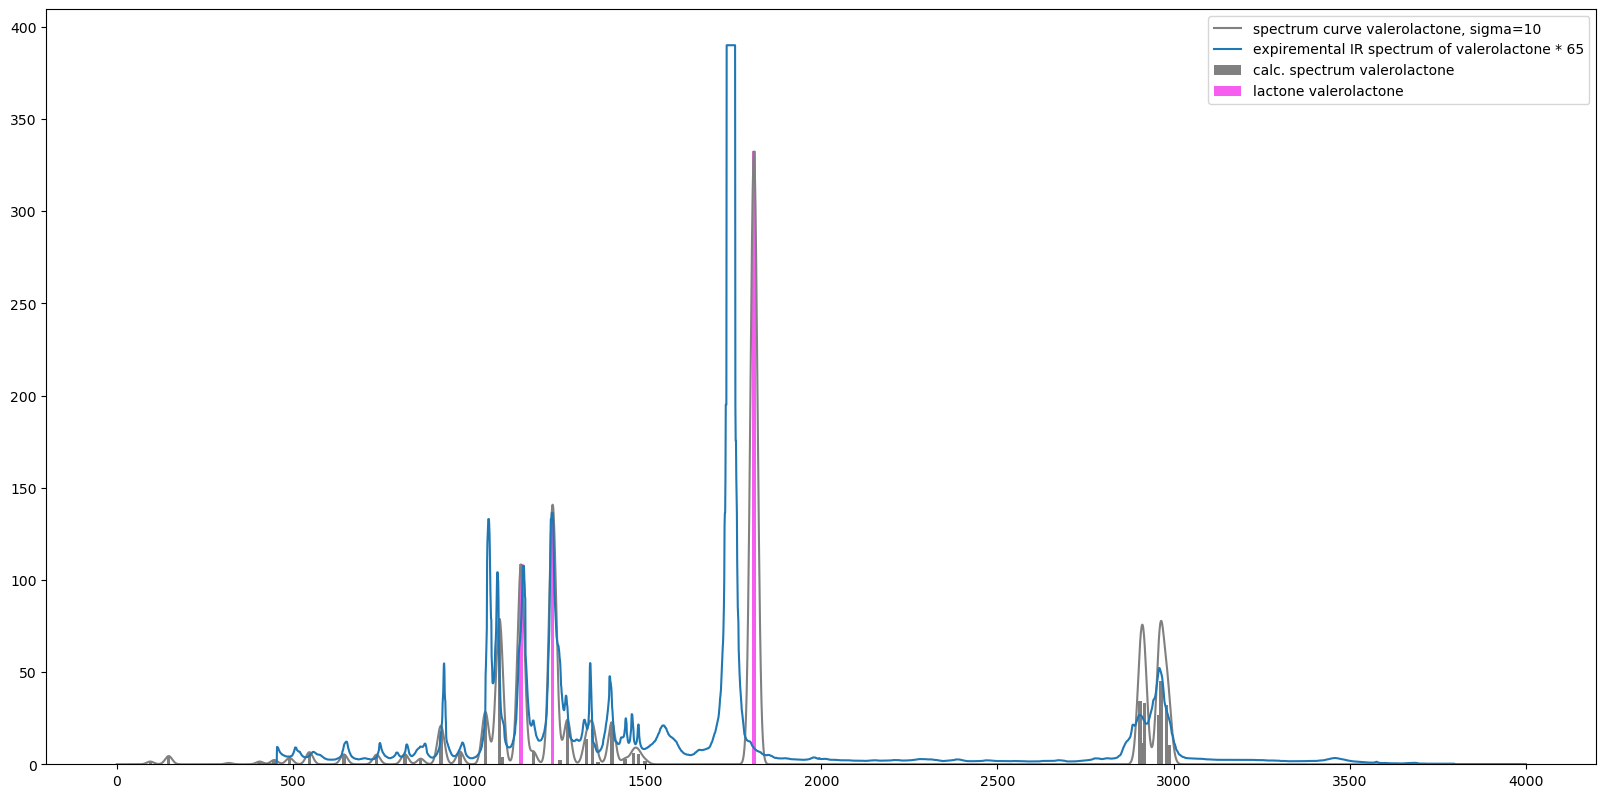

In [14]:
print('Моды, отнесенные к колебаниям лактонной группы, в расчетном спектре:')
print(structs['valerolactone'].get_report('lactone', corrected=True))

plt.figure(figsize=(20, 10), dpi=100)

structs['valerolactone'].pm.spectrum_bar()
structs['valerolactone'].pm.fg_bar('lactone')
structs['valerolactone'].pm.spectrum_curve(sigma=10, annotate=False)

data = read_spectrum_curve('valerolactone.CSV')
intensity_correction_coefficient = 65
plt.plot(data.x, data.y * intensity_correction_coefficient, label='expiremental IR spectrum of valerolactone * ' + str(intensity_correction_coefficient))

plt.legend()
plt.show()

Из приведенного спектра видно, что расчетные данные достаточно хорошо совпадают с эксериментальными, за исключением основной полосы, соответсвующей колебанию C=O связи в лактоне.

In [32]:
calc_freq_corrected = 1810.93
calc_freq = 1847.88
lit_freq_min = 1731
lit_freq_max = 1755
lit_freq = np.mean([lit_freq_min, lit_freq_max])

print(f'Расчетные данные: {calc_freq_corrected} cm-1 (без масштабирубщего множителя: {calc_freq} cm-1),')
print(f'Литературные данные: {lit_freq_min} - {lit_freq_max} cm-1 (среднее {lit_freq} cm-1),')
print(f'Дельта: {round(calc_freq_corrected - lit_freq, 2)} cm-1,')
print(f'Отношение: {round(lit_freq / calc_freq, 4)}')

Расчетные данные: 1810.93 cm-1 (без масштабирубщего множителя: 1847.88 cm-1),
Литературные данные: 1731 - 1755 cm-1 (среднее 1743.0 cm-1),
Дельта: 67.93 cm-1,
Отношение: 0.9432


То есть масштабирующий множитель для C=O колебания в лактоне должен быть 0.9432?

# Список литературы:
[1] https://www.sigmaaldrich.com/technical-documents/articles/biology/ir-spectrum-table.html#ir-spectrum-table-by-range

[2] https://webbook.nist.gov/cgi/cbook.cgi?ID=C542289&Units=SI&Mask=80#IR-Spec

[3] http://www.chem.msu.su/rus/teaching/tarasevich/Tarasevich_IR_tables_29-02-2012.pdf